In [1]:
import numpy as np
import sympy as sp
from package_.plots import plot_two_variables_with_start_point

In [2]:
f = lambda x, y: 4 * x ** 3 + y ** 2 - 6 * x * y - y + 7

f_x_1 = lambda x, y: 12 * x ** 2 - 6 * y
f_x_2 = lambda x: 24 * x
f_x_3 = lambda x: 24

f_y_1 = lambda x, y: -6 * x + 2 * y - 1
f_y_2 = lambda y: 2
f_y_3 = lambda y: 0

START_X = 4
START_Y = 4
EPSILON = 0.000001

In [3]:
# f = lambda x, y: (3 * y ** 3) - (x * y) + (6 * x ** 2) - y + 6
# 
# f_x_1 = lambda x, y: 12 * x - y
# f_x_2 = lambda y: 12
# f_x_3 = lambda y: 0
# 
# f_y_1 = lambda x, y: - x + 9 * y ** 2 - 1
# f_y_2 = lambda y: 18 * y
# f_y_3 = lambda x: 18
# 
# START_X = 2
# START_Y = 1
# EPSILON = 0.000001

In [4]:
# x, y = sp.symbols('x y')
# # f = 10 * x ** 2 + 12 * x * y + 10 * y ** 2
# f = 4 ** 3 + y ** 2 - 6 * x * y - y + 7
# 
# f_x_1 = sp.diff(f, x)
# f_x_2 = sp.diff(f_x_1, x)
# f_x_3 = sp.diff(f_x_2, x)
# 
# f_y_1 = sp.diff(f, y)
# f_y_2 = sp.diff(f_y_1, y)
# f_y_3 = sp.diff(f_y_2, y)
# 
# START_X = 4
# START_Y = 4
# EPSILON = 0.000001

In [5]:
# f = lambda x, y: 10 * x ** 2 + 12 * x * y + 10 * y ** 2
# 
# f_x_1 = lambda x, y: 20 * x + 12 * y
# f_x_2 = lambda y: 20
# f_x_3 = lambda y: 0
# 
# f_y_1 = lambda x, y: 12 * x + 20 * y
# f_y_2 = lambda x: 12
# f_y_3 = lambda x: 0
# 
# START_X = 10
# START_Y = 10
# EPSILON = 0.07

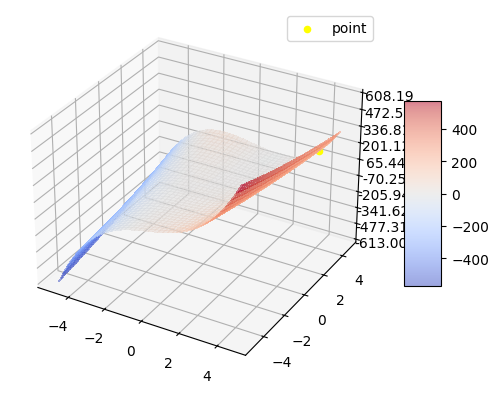

In [6]:
plot_two_variables_with_start_point(START_X, START_Y, f)

In [7]:
def statistic_method(f_1, f_2, f_3, epsilon, prev_iter, a=-100, b=100):
    if f_2(a) * f_2(b) < 0 and f_3(a) * f_3(b) < 0:
        print("Warunki zbieżności nie są spełnione.")

    if f_3(a) * f_1(a, prev_iter) > 0:
        x0 = a
    else:
        x0 = b

    xn = x0
    max_iter = 0
    while True:
        xni = xn - f_1(xn, prev_iter) / f_2(xn)
        if abs(f_1(xni, prev_iter)) < epsilon or abs(xni - xn) < epsilon:
            return xni
        
        if max_iter == 100:
            return xni
        
        max_iter += 1
        xn = xni

In [8]:
def gradient(f, x, y):
    h = 0.00001
    df_dx = (f(x + h, y) - f(x, y)) / h
    df_dy = (f(x, y + h) - f(x, y)) / h
    return np.array([df_dx, df_dy])

In [9]:
def gauss_seidel(initial_point, epsilon):
    x, y = initial_point
    iter = 0
    x_new = statistic_method(f_x_1, f_x_2, f_x_3, epsilon, y)
    y_new = statistic_method(f_x_1, f_x_2, f_x_3, epsilon, x_new)
    
    while True:
        iter += 1
        if np.linalg.norm(gradient(f, x_new, y_new)) <= epsilon:
            return round(x_new, 6), round(y_new, 6) 
    
        y_new = x_new
        
        x_new = statistic_method(f_x_1, f_x_2, f_x_3, epsilon, y_new)
        y_new = statistic_method(f_y_1, f_y_2, f_y_3, epsilon, x_new)
        
        print('iter:', iter)
        if iter in [3, 5, 7, 9, 12, 15]:
            print(iter, x_new, y_new)
            
    return round(x_new, 6), round(y_new, 6)

In [10]:
epsilon = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

for e in epsilon:
    print(gauss_seidel([START_X, START_Y], e))

iter: 1
(0.20066, 6.434165778744207e+62)
iter: 1
(26.027329, 5.88080769604262e+62)
iter: 1
(26.027329, 5.88080769604262e+62)
iter: 1
(26.027329, 5.88080769604262e+62)
iter: 1
(0.621807, 6.425142352853616e+62)
iter: 1
(0.621807, 6.425142352853616e+62)


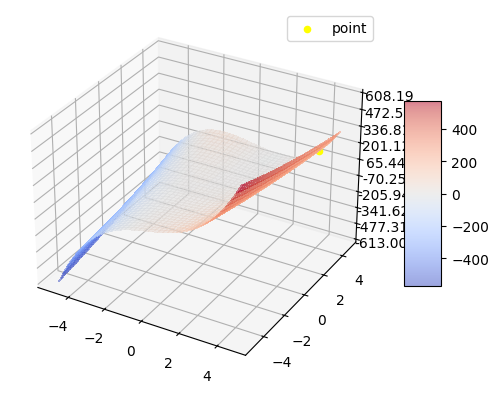

In [11]:
plot_two_variables_with_start_point(START_X, START_Y, f)